In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

43556


In [2]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')
#_font_size = 7.5

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

In [3]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print("PostAnalysis Folder:", postanalysis_folder)
figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print("Figure Folder:", figure_folder)

contact_figure_folder = os.path.join(figure_folder, 'LongRangeContacts')
if not os.path.exists(contact_figure_folder):
    print(f"Create contact_figure_folder: {contact_figure_folder}")
    os.makedirs(contact_figure_folder)
else:
    print(f"Use contact_figure_folder: {contact_figure_folder}")
comp_figure_folder = os.path.join(figure_folder, 'AB_compartment')
if not os.path.exists(comp_figure_folder):
    print(f"Create comp_figure_folder: {comp_figure_folder}")
    os.makedirs(comp_figure_folder)
else:
    print(f"Use comp_figure_folder: {comp_figure_folder}")

PostAnalysis Folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
Figure Folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817
Use contact_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\LongRangeContacts
Use comp_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\AB_compartment


# Load codebook

In [4]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

In [5]:
# sort
from ImageAnalysis3.structure_tools.distance import sort_chr
codebook['sort_chr_key'] = [sort_chr(_c) for _c in codebook['chr']]
codebook = codebook.sort_values(['sort_chr_key','chr_order']).reset_index()
codebook['id'] = codebook.index + 1

In [6]:
codebook

,index,Unnamed: 0,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,...,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604,sort_chr_key
0,0,0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1016,1016,1:9627926-9637875,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1017,1017,1:9799472-9811359,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,985,985,X:166247682-166259932,1978,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
1978,1980,1980,X:167157164-167167452,1979,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
1979,986,986,X:168746045-168757590,1980,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
1980,1981,1981,X:169963295-170005197,1981,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23


# Load chr2Zxys

In [7]:
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
subclass_2_chr2ZxysList = pickle.load(open(subclass_2_chr2Zxys_filename, 'rb'))

In [ ]:
list(sorted(subclass_2_chr2ZxysList.keys()))

# TODO

In [ ]:
subclass_2_majorType = {
 'L2/3 IT','L4/5 IT','L5 ET','L5 IT','L5/6 NP','L6 CT','L6 IT','L6b','Lamp5','Pvalb','Sncg','Sst','Vip',
    'Astro','Endo','SMC', 'Oligo', 'OPC', 'Micro','Peri','VLMC',



}

In [ ]:


majorType_2_chr2ZxysList = {}


# calculate major class contact

In [8]:
# load contact matrix
ensemble_contact_filename = os.path.join(postanalysis_folder, 'ensemble_contactDict_600.pkl')
print(ensemble_contact_filename)
ensemble_contactDict = np.load(ensemble_contact_filename, allow_pickle=True)

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\ensemble_contactDict_600.pkl


In [9]:
subclass_2_contact_filename = os.path.join(postanalysis_folder, 'subclass_2_contactDict_600.pkl')
print(subclass_2_contact_filename)

if os.path.exists(subclass_2_contact_filename):
    print("Loading")
    subclass_2_contactDict = np.load(subclass_2_contact_filename, allow_pickle=True)

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\subclass_2_contactDict_600.pkl
Loading


<IPython.core.display.Javascript object>


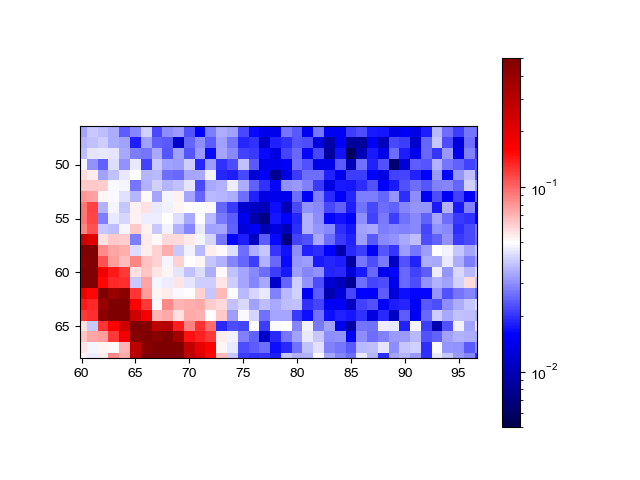

In [73]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots()
_pf = ax.imshow(subclass_2_contactDict['L6 CT'][('cis_1')], 
                norm=LogNorm(vmin=5e-3, vmax=5e-1), cmap='seismic', interpolation='nearest')
#ax.set_title(f"{len()}")
plt.colorbar(_pf)

## detect 3 way targets

In [11]:
from sklearn.neighbors import KDTree
from scipy.spatial.distance import pdist

from tqdm import tqdm

In [12]:
sel_subclass = 'L2/3 IT'

In [14]:
from ImageAnalysis3.structure_tools.contact import find_interaction_groups

In [51]:
num_threads = 48
import multiprocessing as mp


subclass_2_interCoords_list = {}
subclass_2_interRids_list = {}
subclass_2_interChrs_list = {}

for sel_subclass in subclass_2_chr2ZxysList:
    _args = [(_chr2Zxys, codebook) for _chr2Zxys in subclass_2_chr2ZxysList[sel_subclass]]

    with mp.Pool(num_threads) as _pool:
        _start_time = time.time()
        print(f"-- {sel_subclass}, {len(_args)} processing by {num_threads} threads.")

        _inter_groups = _pool.starmap(find_interaction_groups, 
                                      _args, chunksize=1)
        _pool.close()
        _pool.join()
        _pool.terminate()    
    print(f"--- finish: {time.time()-_start_time:.3f}s")

    # append
    subclass_2_interCoords_list[sel_subclass] = [_g[0] for _g in _inter_groups]
    subclass_2_interRids_list[sel_subclass] = [_g[1] for _g in _inter_groups]
    subclass_2_interChrs_list[sel_subclass] = [_g[2] for _g in _inter_groups]


-- Oligo, 4765 processing by 48 threads.
--- finish: 113.447s
-- L6b, 741 processing by 48 threads.
--- finish: 33.215s
-- Astro, 3822 processing by 48 threads.
--- finish: 92.838s
-- VLMC, 444 processing by 48 threads.
--- finish: 26.963s
-- OPC, 1568 processing by 48 threads.
--- finish: 49.336s
-- Endo, 2891 processing by 48 threads.
--- finish: 75.320s
-- L6 CT, 4234 processing by 48 threads.
--- finish: 102.650s
-- Peri, 738 processing by 48 threads.
--- finish: 33.045s
-- Micro, 1523 processing by 48 threads.
--- finish: 48.581s
-- L6 IT, 1837 processing by 48 threads.
--- finish: 54.445s
-- Sncg, 133 processing by 48 threads.
--- finish: 20.777s
-- L2/3 IT, 3095 processing by 48 threads.
--- finish: 78.330s
-- Sst, 746 processing by 48 threads.
--- finish: 33.456s
-- L5 IT, 2014 processing by 48 threads.
--- finish: 57.398s
-- Vip, 357 processing by 48 threads.
--- finish: 25.288s
-- Pvalb, 993 processing by 48 threads.
--- finish: 37.820s
-- Lamp5, 339 processing by 48 threads.

In [61]:
subclass_2_allInterRids = {}
for _subcls, _interRids_list in subclass_2_interRids_list.items():
    subclass_2_allInterRids[_subcls] = []
    for _rs in _interRids_list:
        subclass_2_allInterRids[_subcls].extend(_rs)


In [63]:
# interacting_pairs
from itertools import combinations

subclass_2_arr = {}

for _subcls, _all_inter_rids in subclass_2_allInterRids.items():
    _all_pairs = np.concatenate([list(combinations(_rs,2)) for _rs in _all_inter_rids])
    _pairs, _pair_counts = np.unique(_all_pairs, axis=0, return_counts=True)

    
    _arr = np.zeros([len(codebook),len(codebook)])
    _arr[_pairs[:,0], _pairs[:,1]] = _pair_counts
    _arr[_pairs[:,1], _pairs[:,0]] = _pair_counts

    for _chr, _inds in chr_2_indices.items():
        _arr[_inds[:,np.newaxis], _inds] = np.nan
    subclass_2_arr[_subcls] = _arr

<IPython.core.display.Javascript object>


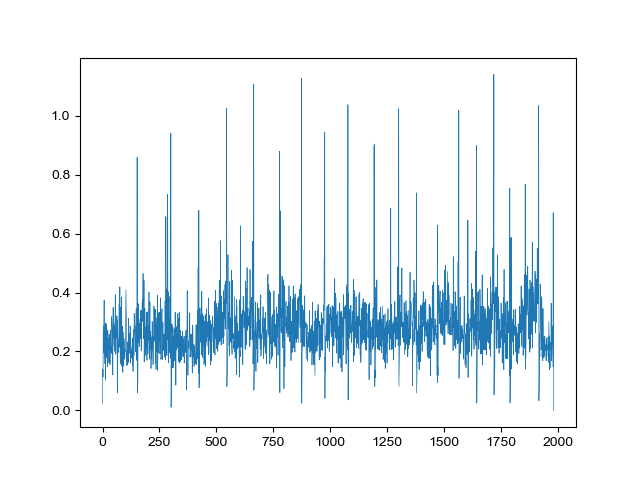

In [74]:
plt.figure()
plt.plot(np.nanmean(subclass_2_arr['Oligo'], axis=0), linewidth=0.5)
plt.show()

<IPython.core.display.Javascript object>


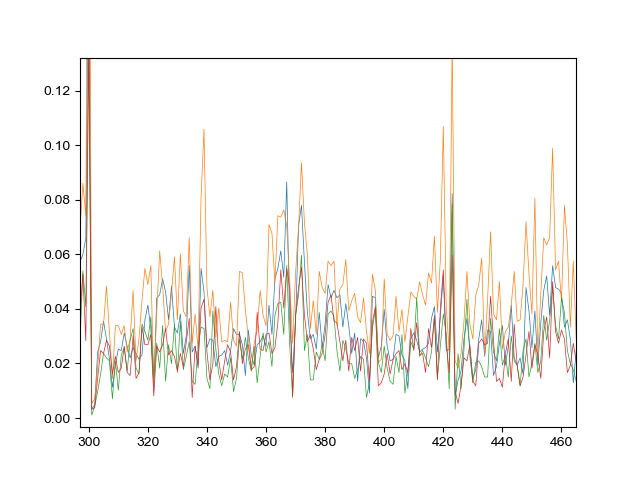

In [71]:
plt.figure()
#plt.plot(np.nanmean(subclass_2_arr['Oligo'], axis=0), linewidth=0.5)
plt.plot(np.nanmean(subclass_2_arr['L2/3 IT'], axis=0), linewidth=0.5)
plt.plot(np.nanmean(subclass_2_arr['L4/5 IT'], axis=0), linewidth=0.5)
plt.plot(np.nanmean(subclass_2_arr['L5 IT'], axis=0), linewidth=0.5)
plt.plot(np.nanmean(subclass_2_arr['L6 IT'], axis=0), linewidth=0.5)


In [56]:
_all_pairs

array([], dtype=float64)

In [55]:
_pairs

array([], dtype=float64)

In [17]:

_all_inter_rids = []
_all_inter_chrs = []
for _rs, _chrs in zip(interRids_list, interChrs_list):
    
    _all_inter_rids.extend(_rs)
    _all_inter_chrs.extend(_chrs)
    
    

In [27]:
sort_by_region = False
from ImageAnalysis3.structure_tools import distance

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=sort_by_region)

In [47]:
for _chr,_inds in chr_2_indices.items():
    print(_chr,len(_inds))

1 153
2 148
3 123
4 122
5 119
6 114
7 96
8 102
9 102
10 117
11 106
12 78
13 92
14 94
15 78
16 76
17 70
18 68
19 59
X 64
Y 1


In [48]:
codebook.iloc[np.where(np.nanmean(_arr, axis=0) > 0.15 )[0]][['id','name','chr','chr_order']]

,id,name,chr,chr_order
300,301,2:181252282-181259985,2,147.0
545,546,4:156248300-156256009,4,121.0
664,665,5:151247995-151259984,5,118.0
874,875,7:143752889-143759788,7,95.0
976,977,8:128740029-128759892,8,101.0
1078,1079,9:123741973-123759929,9,101.0
1193,1194,10:127524559-127544559,10,114.0
1195,1196,10:128748541-128759793,10,116.0
1266,1267,11:78489091-78509091,11,70.0
1301,1302,11:121514467-121522938,11,105.0


<IPython.core.display.Javascript object>


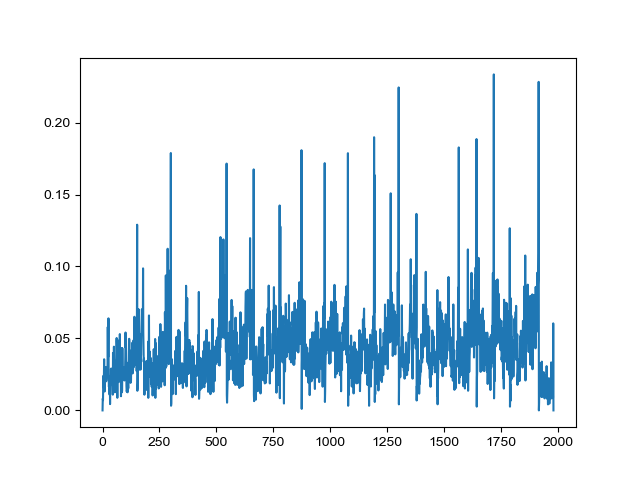

In [41]:
plt.figure()
plt.plot(np.nanmean(_arr, axis=0))

<IPython.core.display.Javascript object>


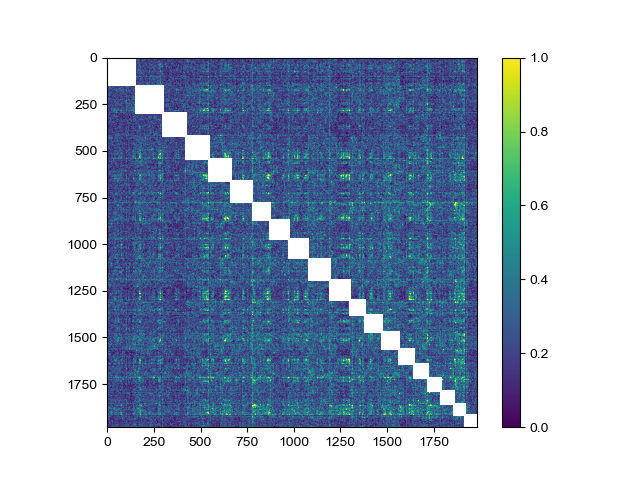

In [72]:
plt.figure()
plt.imshow(subclass_2_arr['Oligo'], vmin=0, vmax=1,)
plt.colorbar()

In [ ]:
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(ensemble_contact_mat, cmap='seismic', norm=LogNorm(vmin=1e-3, vmax=2e-1))
plt.colorbar()

In [25]:
from ImageAnalysis3.structure_tools import distance
ensemble_contact_mat, _chr_edges, _chr_names = distance.assemble_ChrDistDict_2_Matrix(
    ensemble_contactDict, codebook, use_cis=True, use_trans=False, sort_by_region=False)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92 

<IPython.core.display.Javascript object>


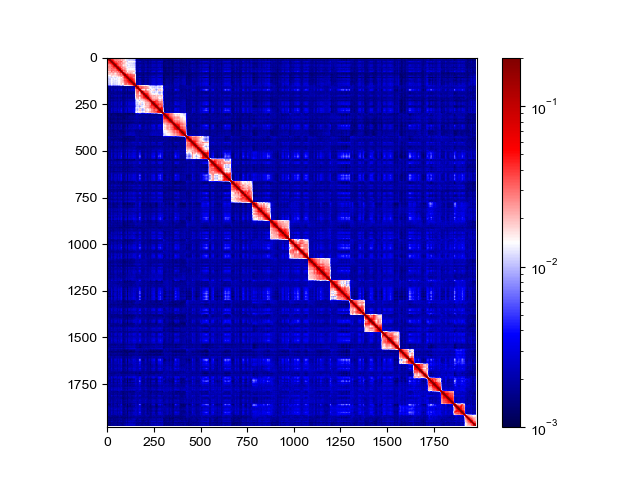

In [26]:
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(ensemble_contact_mat, cmap='seismic', norm=LogNorm(vmin=1e-3, vmax=2e-1))
plt.colorbar()

<IPython.core.display.Javascript object>


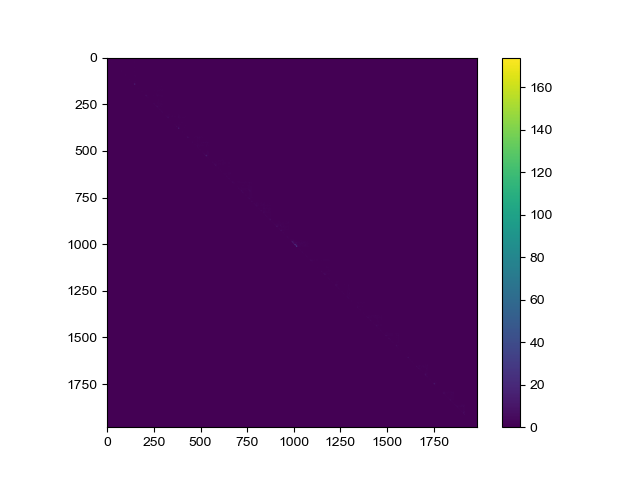

<IPython.core.display.Javascript object>


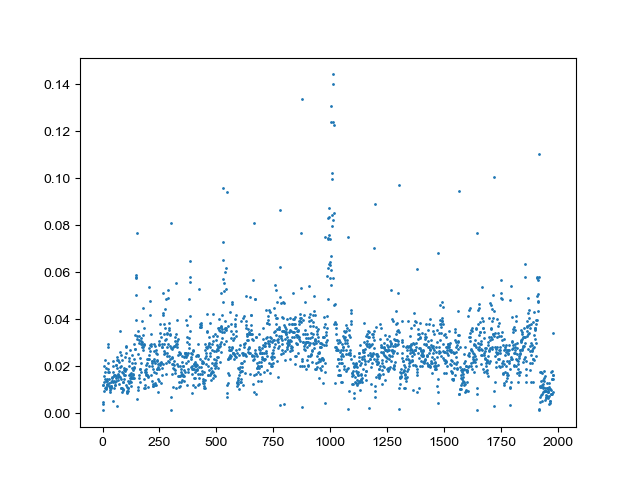

In [143]:
plt.figure()
plt.scatter(_rs, _rcts/len(interRids_list), s=1)

In [100]:
len(sel_inter_groups)

142

In [75]:
(_cell_zxys[np.array(_g)])

array([[ 2.86443603, -0.60932827, -2.67123478],
       [ 2.45840936, -0.53295247, -2.61481378],
       [ 2.24829253, -0.40092751, -2.53286518]])

<IPython.core.display.Javascript object>


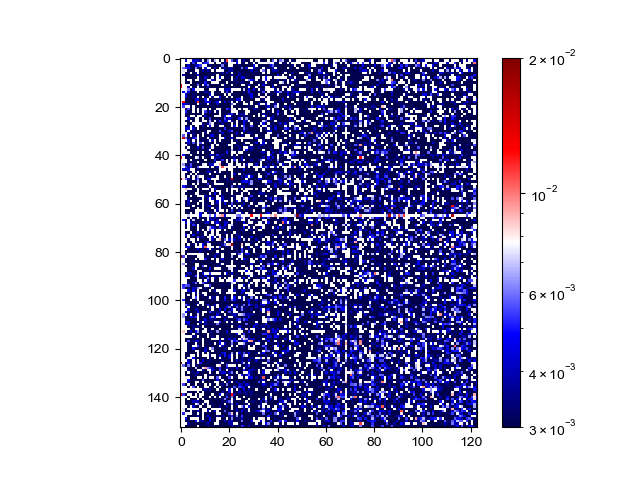

In [12]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots()
_pf = ax.imshow(subclass_2_contactDict['Astro'][('1','3')], norm=LogNorm(vmin=3e-3, vmax=2e-2), 
                cmap='seismic', interpolation='nearest')
plt.colorbar(_pf)